In [61]:
import pandas as pd
from collections import defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import spacy

In [62]:
df = pd.read_csv("scopus.csv")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14561 entries, 0 to 19998
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Authors            14561 non-null  object 
 1   Author full names  14561 non-null  object 
 2   Author(s) ID       14561 non-null  object 
 3   Title              14561 non-null  object 
 4   Year               14561 non-null  int64  
 5   Source title       14559 non-null  object 
 6   Volume             8831 non-null   object 
 7   Issue              4173 non-null   object 
 8   Art. No.           7468 non-null   object 
 9   Page start         10482 non-null  object 
 10  Page end           10470 non-null  object 
 11  Page count         10472 non-null  float64
 12  Cited by           14561 non-null  float64
 13  DOI                14284 non-null  object 
 14  Link               14561 non-null  object 
 15  Abstract           14561 non-null  object 
 16  Author Keywords    145

In [63]:
df = df.dropna(subset=['Authors','Abstract','Author Keywords','Index Keywords'])

In [66]:
# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [82]:
# Words to exclude
exclude_words = {"software", "defined", "network", 'networks','networking','using','g', "sdn", "software-defined",'based'}

In [83]:
# Initialize a dictionary to store keywords by year
keywords_by_year = defaultdict(list)

In [89]:
# Process titles and extract keywords
for index, row in df.iterrows():
    doc = nlp(row["Abstract"])
    keywords = [token.text.lower() for token in doc if
                token.text.lower() not in exclude_words and re.match(r"^[a-zA-Z]+$", token.text)]
    keywords_by_year[row["Year"]].extend(keywords)

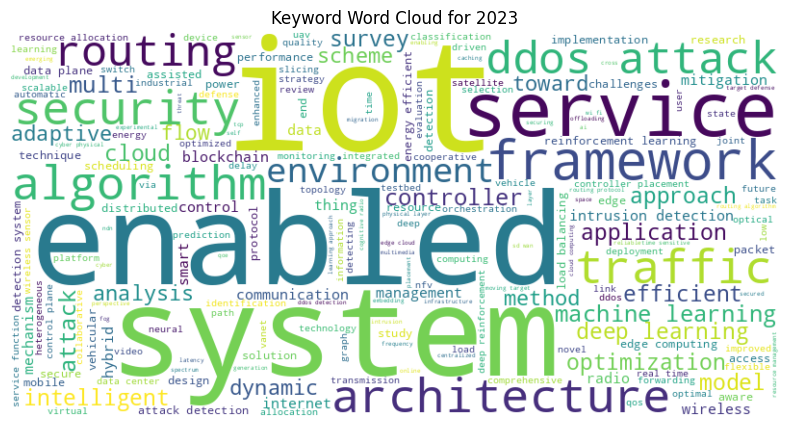

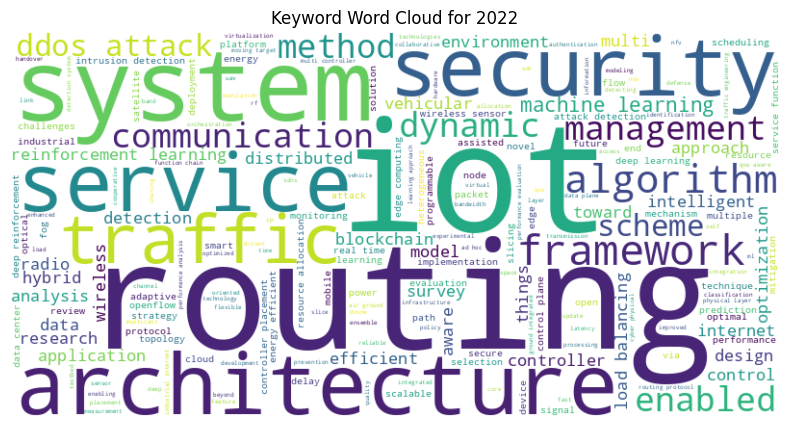

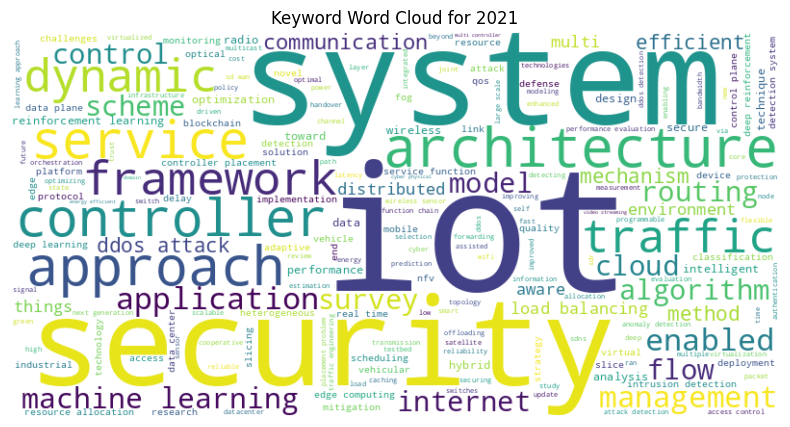

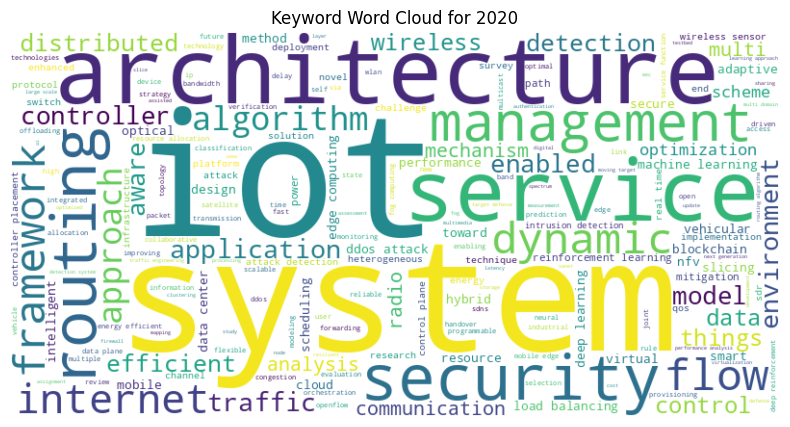

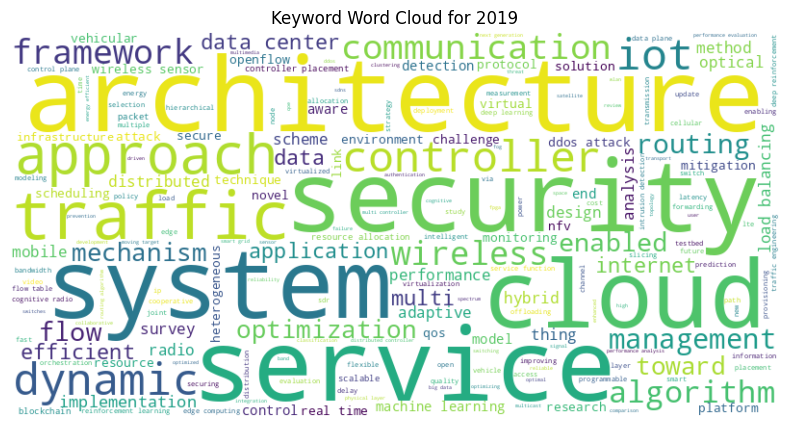

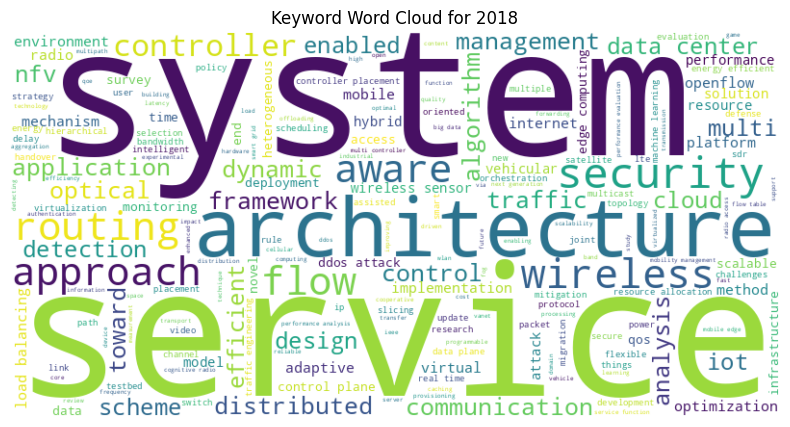

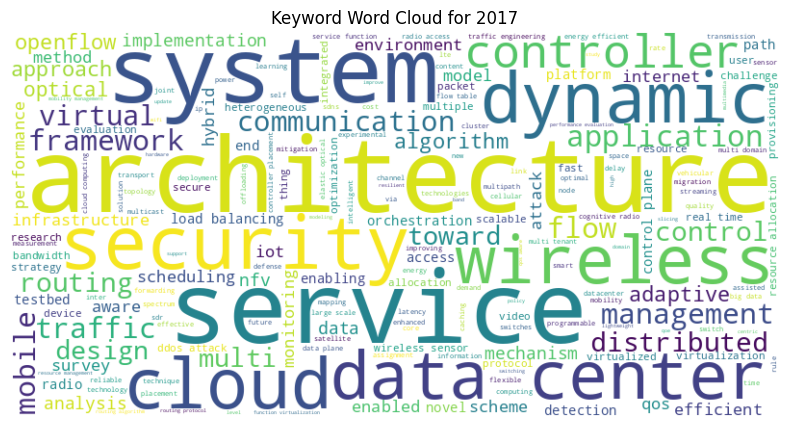

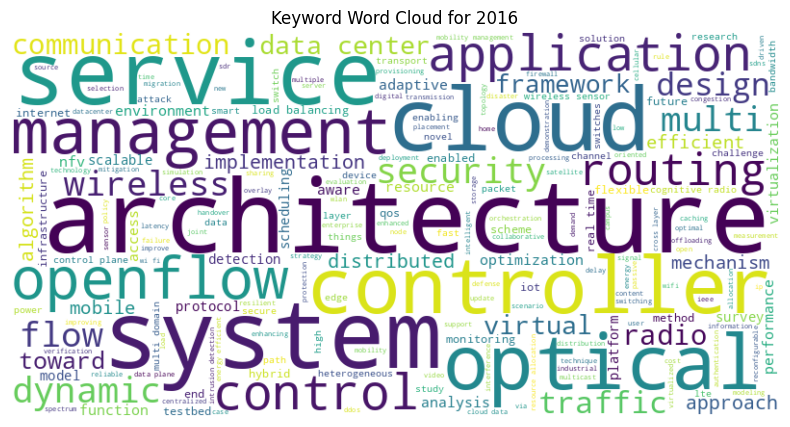

In [85]:
# Create word clouds for each year
for year, keywords in keywords_by_year.items():
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Keyword Word Cloud for {year}")
    plt.axis("off")
    plt.show()

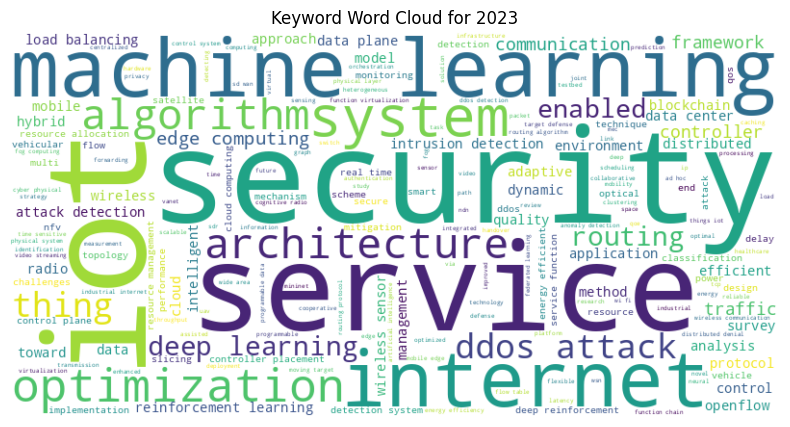

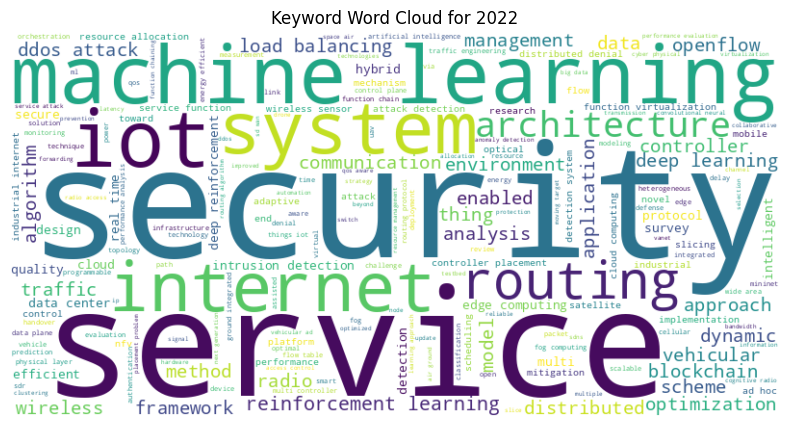

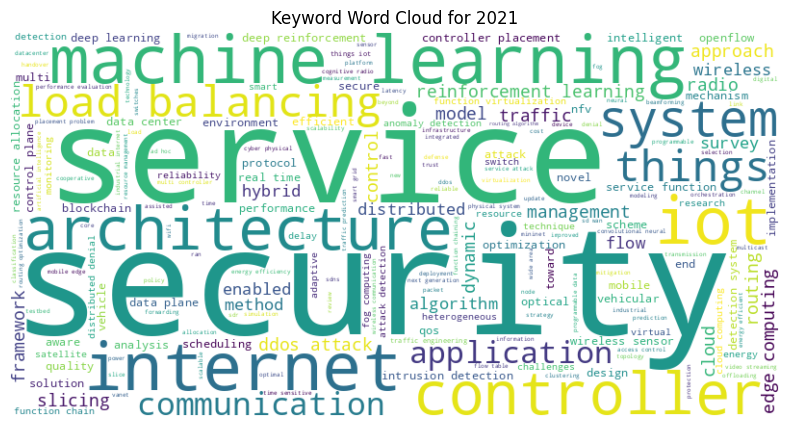

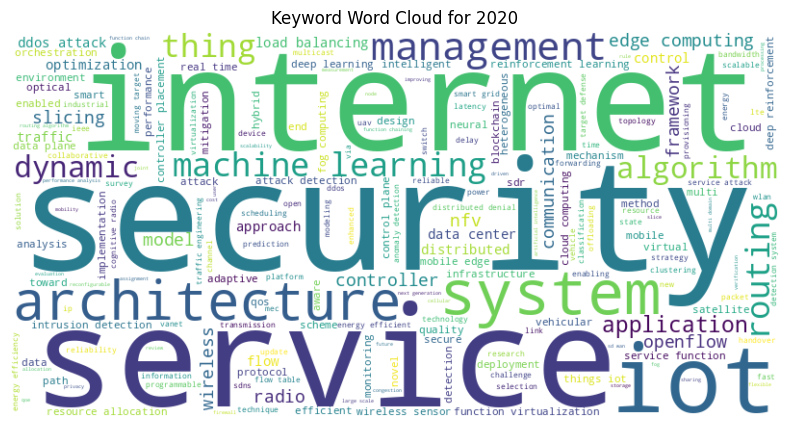

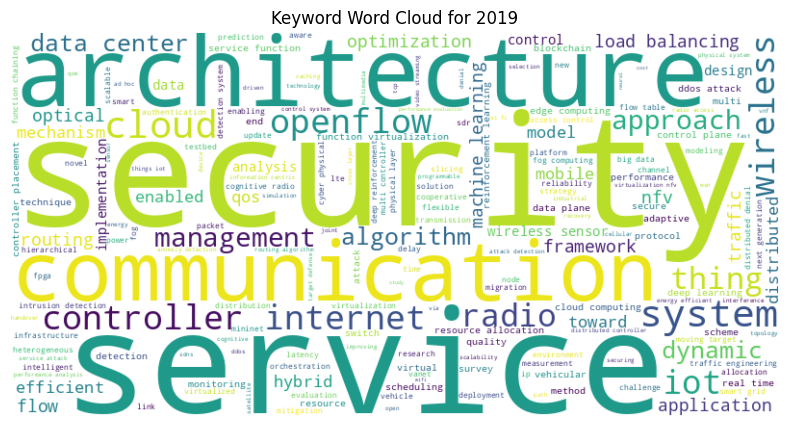

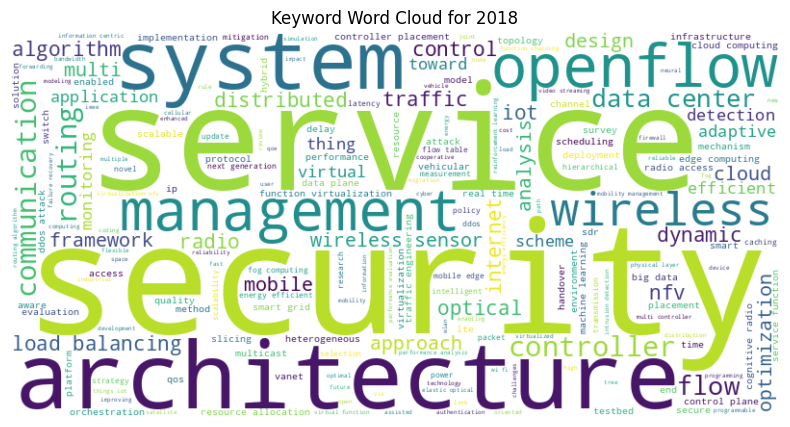

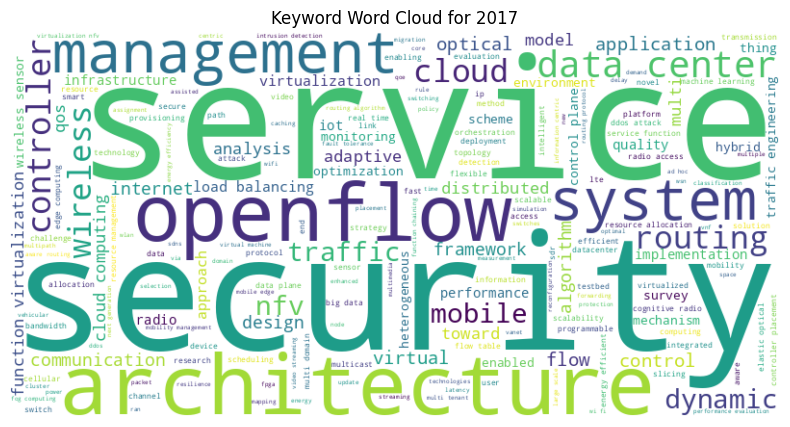

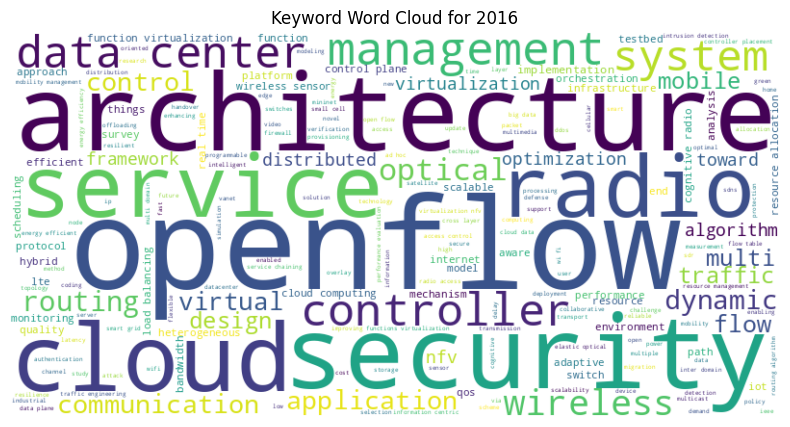

In [88]:
# Create word clouds for each year (by Author Keywords)
for year, keywords in keywords_by_year.items():
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Keyword Word Cloud for {year}")
    plt.axis("off")
    plt.show()

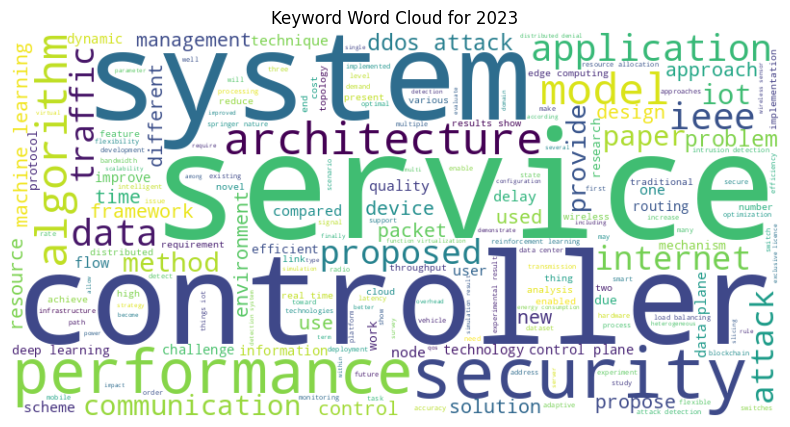

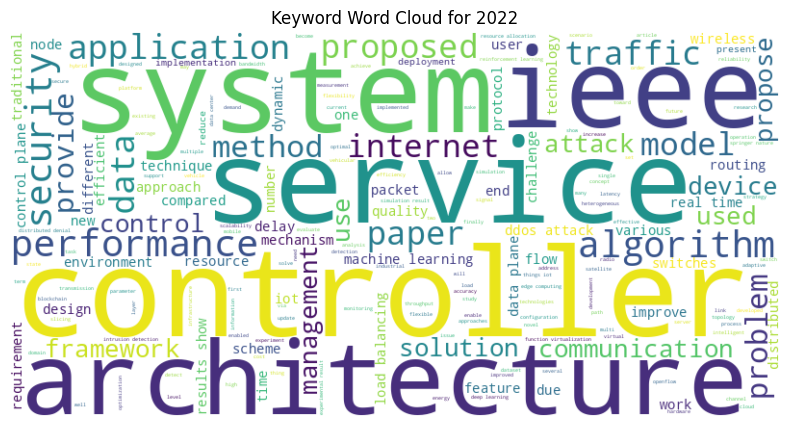

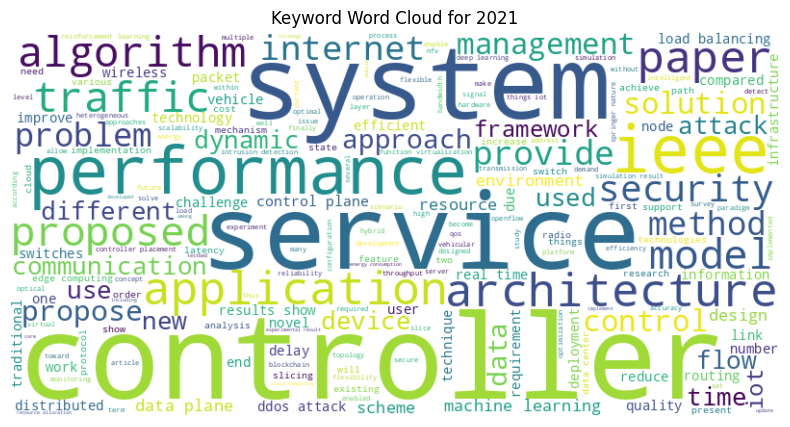

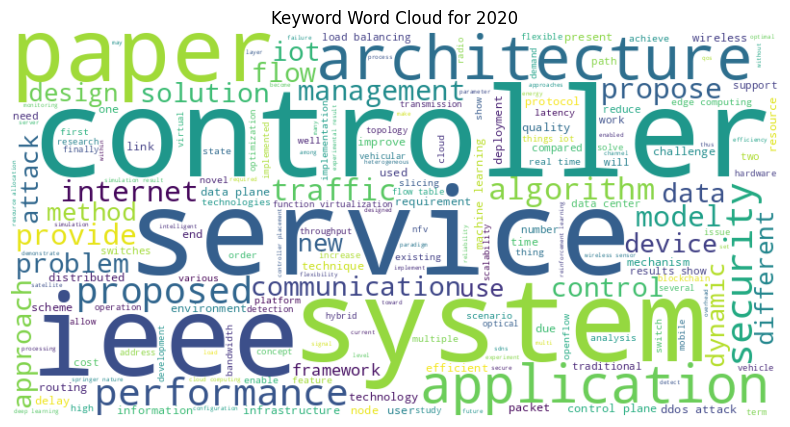

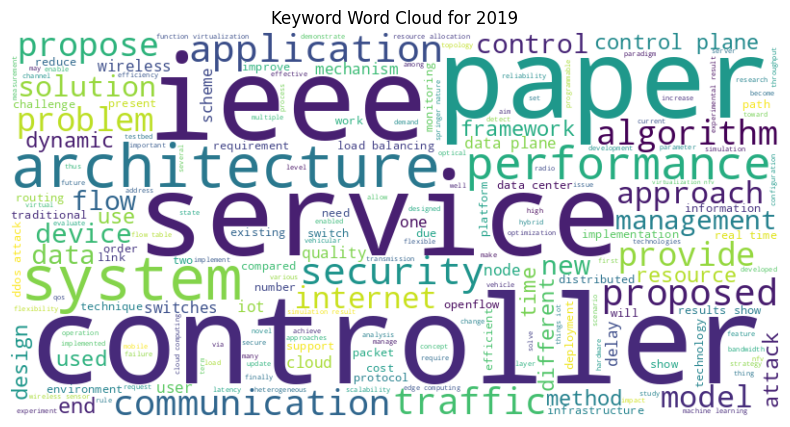

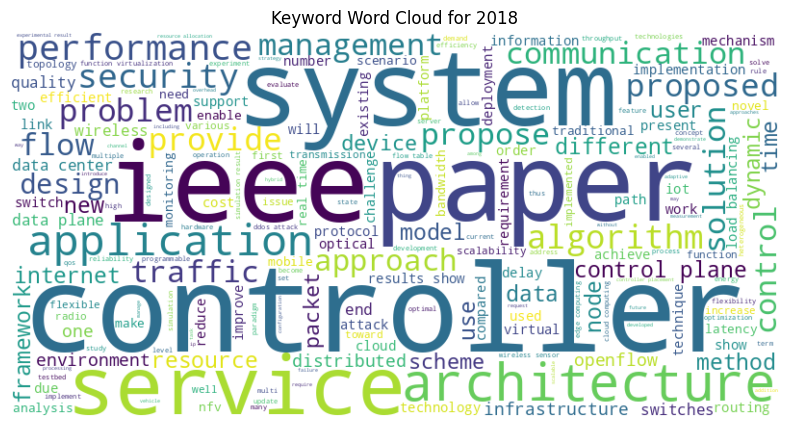

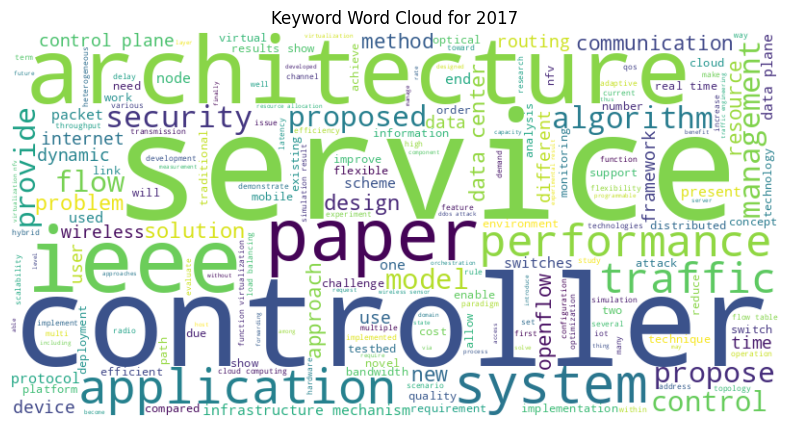

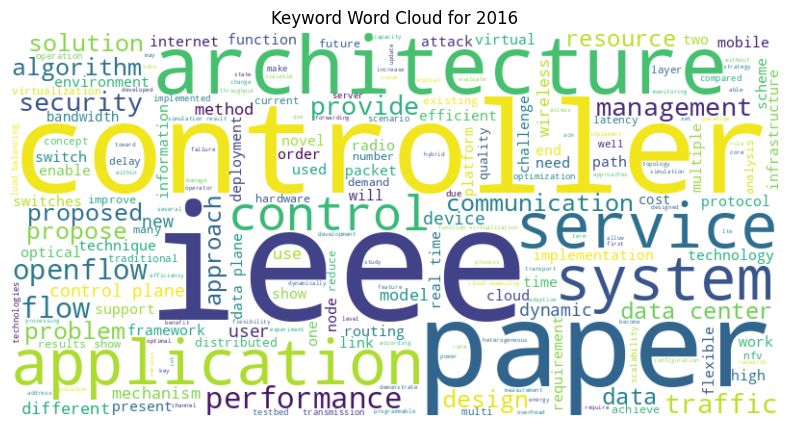

In [90]:
# Create word clouds for each year (by Author Keywords)
for year, keywords in keywords_by_year.items():
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Keyword Word Cloud for {year}")
    plt.axis("off")
    plt.show()